# Explolation02
##  
## 서론
### 두가지 실습을 통해 딥러닝의 기초인 선형회귀방식에대해 알아보자.  
### mse값을 3000이하로 하게해라.
## 본론
### 1. 당뇨병 수치 맞춰보기
#### 1-1) 데이터 가져오기
#### 1-2) 모델에 입력할 데이터 x 준비하기
#### 1-3) 모델에 예측할 데이터 y 준비하기
#### 1-4) tranin 데이터와 test데이터로 가져오기
#### 1-5) 모델 준비하기
#### 1-6) 손실함수 loss정의하기
#### 1-7) 기울기를 gradient 함수 구현하기
#### 1-8) 하이퍼 파라미터인 학습률 설정하기
#### 1-9) 모델 학습하기
#### 1-10) test 데이터에 대한 성능 확인하기
#### 1-11) 정답 데이터와 예측한 데이터 시각화하기
### 2. 자전거 타는사람 몇명인지 예측하기
#### 2-1) 데이터 가져오기
#### 2-2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
#### 2-3) year, month, day, hour, minute, second 데이터 개수 시각화하기
#### 2-4) X, y 컬럼 선택 및 train/test 데이터 분리
#### 2-5) LinearRegression 모델 학습
#### 2-6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
#### 2-7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
## 결론
#### 시각화한 결과들을 분석해보자

____________________________________________________________________________________________________________________________________________________________

# Elplolation 02

____________________________________________________________________________________________________________________________________________________________
## 서론
### 두가지 실습을 통해 딥러닝의 기초인 선형회귀방식에대해 알아보자.
____________________________________________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________________________________________
## 본론
### 1. 당뇨병 수치 맞춰보기


#### 1-1) 데이터 가져오기

In [65]:
from sklearn.datasets import load_diabetes # 당뇨병 데이터셋 가져오기
diabetes = load_diabetes() # 변수에 가져온 데이터셋 저장하기
df_x = diabetes.data # 변수에 당뇨병 데이터들 저장하기
df_y = diabetes.target # 변수에 당뇨병 타겟 저장하기
print(diabetes.data.shape, diabetes.target.shape) # 데이터와 타겟 형태 확인하기
print(df_x.shape, df_y.shape) # 변수에 잘 저장되었나 확인하기
print(diabetes.feature_names) # 데이터 이해하기
print(diabetes.DESCR ) # 데이터 이해하기
print(type(df_x))


(442, 10) (442,)
(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possi

#### 1-2) 모델에 입력할 데이터 x 준비하기

In [66]:
import numpy as np
import pandas as pd
x=np.array(df_x)

#### 1-3) 모델에 예측할 데이터 y 준비하기

In [67]:
y=np.array(df_y)

#### 1-4) tranin 데이터와 test데이터로 가져오기

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42) # train 데이터와 test 데이터 분리
print(X_train.shape) # 잘 분리되었나 확인
print(X_test.shape) # 잘 분리되었나 확인
print(y_train.shape) # 잘 분리되었나 확인)
print(y_test.shape) # 잘 분리되었나 확인

(353, 10)
(89, 10)
(353,)
(89,)


#### 1-5) 모델 준비하기

In [69]:
W = np.random.rand(10) # 입력 데이터값이 10개이므로 w값 랜덤한10개로 설정
b = np.random.rand() # b는 한개
print(W, "\n", b)

[0.82166958 0.34456525 0.80099586 0.07729038 0.54946141 0.78692731
 0.25504789 0.98395276 0.71177397 0.57746984] 
 0.521071628178289


In [70]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i] # x1*w1+x2*w2+...+x10*w10
    predictions += b # x1*w1+x2*w2+...+x10*w10 +b
    return predictions

#### 1-6) 손실함수 loss정의하기

In [71]:
def MSE(a, b): # 공식에 맞게 손실 함수식 정의
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [72]:
def loss(X, W, b, y): # loss 정의
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

#### 1-7) 기울기를 gradient 함수 구현하기

In [73]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)# 위에 만들어놨던 model
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [74]:
dW, db = gradient(df_x, W, b, df_y)# 기울기 확인
print("dW:", dW)
print("db:", db)



dW: [ -60.45271492  -13.710033   -189.44457105 -142.59925391  -68.09061471
  -55.81172429  127.52112459 -138.79125591 -182.69132638 -123.38102062]
db: -303.2248250694352


#### 1-8) 하이퍼 파라미터인 학습률 설정하기

In [75]:
LEARNING_RATE = 0.02
losses = []

for i in range(1, 1000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 15856.5604
Iteration 20 : Loss 9643.1942
Iteration 30 : Loss 6760.1768
Iteration 40 : Loss 5373.4943
Iteration 50 : Loss 4667.6828
Iteration 60 : Loss 4278.4057
Iteration 70 : Loss 4041.5195
Iteration 80 : Loss 3882.0152
Iteration 90 : Loss 3764.8008
Iteration 100 : Loss 3672.8374
Iteration 110 : Loss 3597.3874
Iteration 120 : Loss 3533.6346
Iteration 130 : Loss 3478.6928
Iteration 140 : Loss 3430.6832
Iteration 150 : Loss 3388.2929
Iteration 160 : Loss 3350.5535
Iteration 170 : Loss 3316.7233
Iteration 180 : Loss 3286.2195
Iteration 190 : Loss 3258.5752
Iteration 200 : Loss 3233.4118
Iteration 210 : Loss 3210.4186
Iteration 220 : Loss 3189.3381
Iteration 230 : Loss 3169.9551
Iteration 240 : Loss 3152.0880
Iteration 250 : Loss 3135.5824
Iteration 260 : Loss 3120.3058
Iteration 270 : Loss 3106.1436
Iteration 280 : Loss 3092.9959
Iteration 290 : Loss 3080.7751
Iteration 300 : Loss 3069.4036
Iteration 310 : Loss 3058.8125
Iteration 320 : Loss 3048.9400
Iteration 330 : 

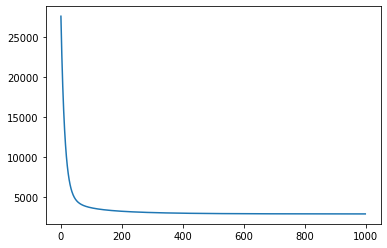

In [76]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.plot()
plt.show()

#### 1-9) 모델 학습하기

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### 1-10) test 데이터에 대한 성능 확인하기

In [78]:
predictions = model.predict(X_test)
predictions

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [79]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2900.1732878832313

#### 1-11) 정답 데이터와 예측한 데이터 시각화하기

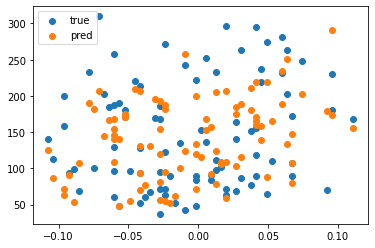

In [80]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

#### 테스트 값과 

____________________________________________________________________________________________________________________________________________________________
### 2. 자전거 타는사람 몇명인지 예측하기


#### 2-1) 데이터 가져오기

In [81]:
df_bicycle = pd.read_csv('~/aiffel/train.csv')
print(df_bicycle.shape)
df_bicycle

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### 2-2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [82]:
df_bicycle['datetime'] = pd.to_datetime(df_bicycle['datetime']) # datetime 컬럼을 datime자료형으로 변환
df_bicycle['year']=df_bicycle['datetime'].dt.year # 연도컬럼생성
df_bicycle['month']=df_bicycle['datetime'].dt.month # 월 컬럼생성
df_bicycle['day']=df_bicycle['datetime'].dt.day # 일 컬럼 생성
df_bicycle['hour']=df_bicycle['datetime'].dt.hour # 시 컬럼생성
df_bicycle['minute']=df_bicycle['datetime'].dt.minute # 분 컬럼생성
df_bicycle['second']=df_bicycle['datetime'].dt.second # 초 컬럼생성
df_bicycle

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


#### 2-3) year, month, day, hour, minute, second 데이터 개수 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

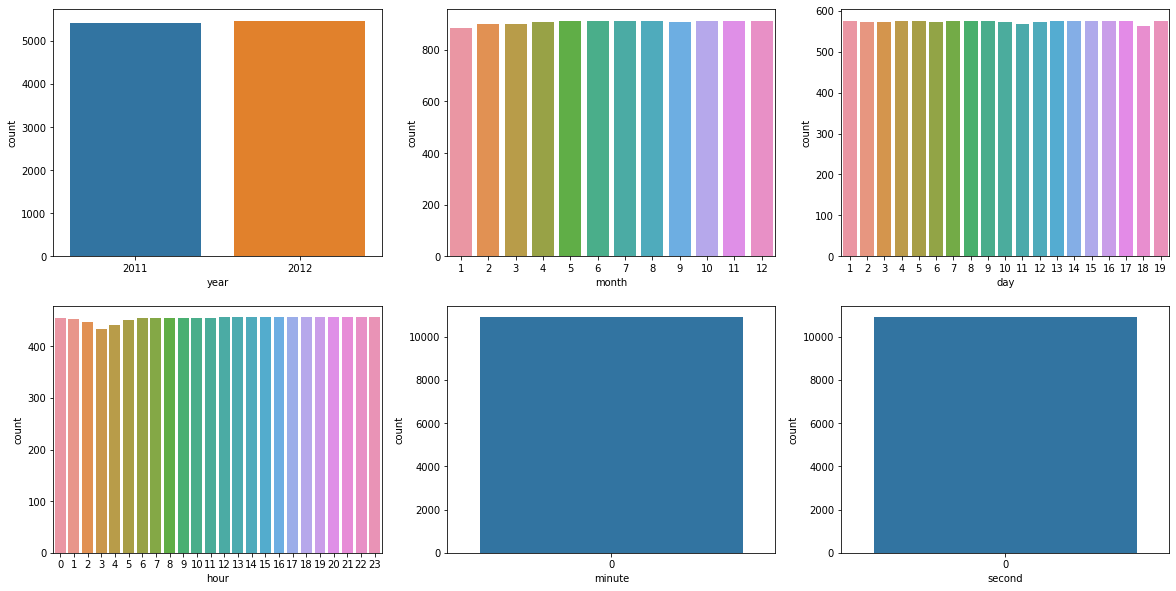

In [83]:
import seaborn as sns
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
sns.countplot(x="year", data=df_bicycle, ax=ax[0][0])
sns.countplot(x="month", data=df_bicycle,ax=ax[0][1])
sns.countplot(x="day", data=df_bicycle,ax=ax[0][2])
sns.countplot(x="hour", data=df_bicycle,ax=ax[1][0])
sns.countplot(x="minute", data=df_bicycle,ax=ax[1][1])
sns.countplot(x="second", data=df_bicycle,ax=ax[1][2])



#### 2-4) X, y 컬럼 선택 및 train/test 데이터 분리

In [84]:
from sklearn.model_selection import train_test_split
bicycle_x=df_bicycle.loc[:,["season", "workingday" ,"temp"	,"atemp","windspeed","year","humidity"	,"month"	,"day",	"hour"]]
							
bicycle_y=df_bicycle["count"]
X2_train, X2_test, y2_train, y2_test = train_test_split(bicycle_x, bicycle_y, test_size=0.2, random_state=42) # train 데이터와 test 데이터 분리



In [85]:
bicycle_x.shape

(10886, 10)

#### 2-5) LinearRegression 모델 학습

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

#### 2-6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [87]:
predictions2 = model.predict(X2_test)
predictions2

array([247.18504797,  55.16231126, 199.40697548, ..., 308.83287884,
        33.67614714, 250.67400528])

In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt # 제곱해주는 라이브러리
mse = mean_squared_error(y2_test, predictions2)
rms=sqrt(mse)
print(mse) # mse값 출력
print(rms) # rmse값 출력

19945.83836296607
141.22973611448145


#### 2-7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

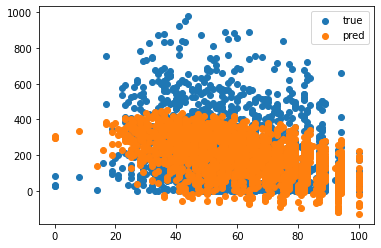

In [89]:
import matplotlib.pyplot as plt

plt.scatter(X2_test.loc[:,"humidity"], y2_test, label="true")
plt.scatter(X2_test.loc[:,"humidity"], predictions2, label="pred")
plt.legend()
plt.show()

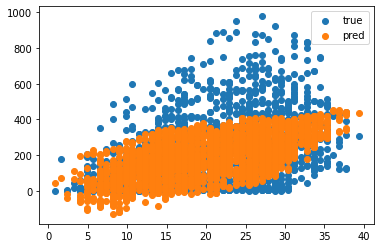

In [90]:
import matplotlib.pyplot as plt

plt.scatter(X2_test.loc[:,"temp"], y2_test, label="true")
plt.scatter(X2_test.loc[:,"temp"], predictions2, label="pred")
plt.legend()
plt.show()

____________________________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________________________
## 결론
#### 시각화한 결과들을 분석해보자

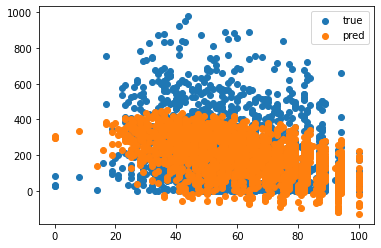

In [91]:
plt.scatter(X2_test.loc[:,"humidity"], y2_test, label="true")
plt.scatter(X2_test.loc[:,"humidity"], predictions2, label="pred")
plt.legend()
plt.show()

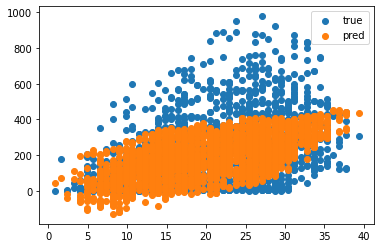

In [92]:
plt.scatter(X2_test.loc[:,"temp"], y2_test, label="true")
plt.scatter(X2_test.loc[:,"temp"], predictions2, label="pred")
plt.legend()
plt.show()

#### 꽤나 예측을 잘해준것 같아 기쁘다. Rmse값도 150 이하로 나와줬다.
#### Explolation02에서는 머신러닝 선형회귀 방식에대해 공부를 해보았다. 
#### 실무에서 선형회귀 모듈을 많이 쓰는진 모르겠지만 개인적으로는 좋은 모듈인것같다. 이것으로 Explolation02를 마친다.